In [6]:
from itertools import combinations
from random import random
import numpy as np
import timeit 
class AdjNode:
    def __init__(self, value):
        self.vertex = value
        self.next = None

class Graph:
    def __init__(self, num):
        self.V = num
        self.graph = [None] * self.V
    
    def add_edge(self, s, d):
        node = AdjNode(d)
        node.next = self.graph[s]
        self.graph[s] = node
        
        node = AdjNode(s)
        node.next = self.graph[d]
        self.graph[d] = node

    # Print the graph
    def print_agraph(self):
        for i in range(self.V):
            print("Vertex " + str(i) + ":", end="")
            temp = self.graph[i]
            while temp:
                print(" -> {}".format(temp.vertex), end="")
                temp = temp.next
            print(" \n")
            
    def vertex_degree(self):
        
        x = np.zeros(self.V)
        for i in range(self.V):
            count = 0
            temp = self.graph[i]
            while temp:
                count = count + 1
                temp = temp.next
            x[i] = count
            
            
        
        return x
            
            
    def ER(self,p):
        n = self.V
        V = set([v for v in range(n)])
        for combination in combinations(V, 2):
            if random() <= p:
                self.add_edge(combination[0],combination[1])    
    ## change code
    def BFS2(self, root):
        graph = self.graph
        current_level = []
        current_level.append(root)
        level = 0;
        vs = set();
        vs.add(root)
        while(current_level != []):
            new =[]
            for neigh in current_level:
                node = graph[neigh]
                while(node != None):
                    d = node.vertex
                    if(d not in vs) :
                        vs.add(d)
                        new.append(d)
                    node = node.next
            current_level = new           
            level = level + 1        
        level = level - 1
        return level  
            
    def max_diameter(self):
        a = 0
        for i in range(self.V):
            a = max(self.BFS(i),a)
        return a
            
if __name__ == "__main__":
    graph = Graph(1000)
    p = np.arange(0.022,0.001, -0.002)
    s = np.zeros([len(p),1000])
    for i in range(len(p)):
        graph.ER(p[i])
        s[i,:] = graph.vertex_degree()
  

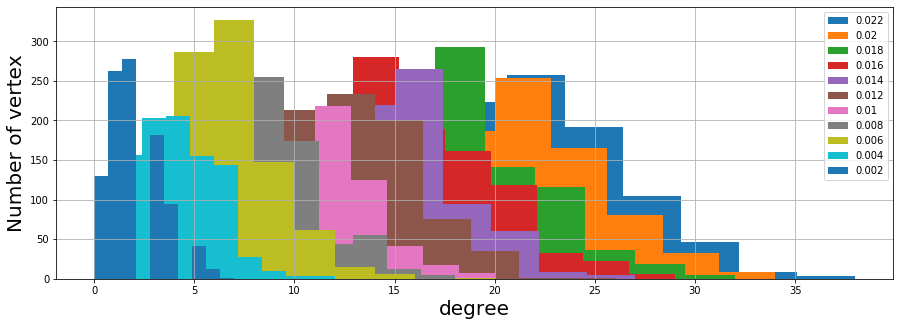

In [8]:
import matplotlib.pyplot as plt
import numpy as np

ax = plt.figure(figsize = (15,5))
plt.grid(True)


for i in range(len(p)):
    graph = Graph(1000)
    graph.ER(p[i])
    t = graph.vertex_degree()
    plt.hist(t,label = round(p[i],3))

plt.xlabel('degree',fontsize = 20)
plt.ylabel('Number of vertex',fontsize = 20)
plt.savefig('problem4_2.jpg')
plt.legend()

[4. 2. 0. 0. 0. 3. 1. 1. 1. 1. 3. 4. 0. 2. 2. 4. 3. 0. 2. 1. 3. 2. 1. 0.
 0. 2. 1. 4. 2. 2. 0. 1. 1. 3. 5. 0. 2. 1. 3. 3. 2. 3. 3. 0. 4. 2. 0. 3.
 2. 6. 1. 3. 4. 1. 1. 6. 0. 0. 3. 0. 4. 4. 1. 3. 0. 5. 0. 3. 1. 2. 0. 2.
 1. 1. 0. 3. 2. 1. 3. 3. 1. 3. 2. 2. 0. 1. 3. 0. 2. 1. 0. 4. 2. 2. 1. 3.
 1. 2. 1. 0. 1. 3. 4. 0. 3. 5. 2. 1. 1. 3. 5. 1. 3. 2. 4. 4. 4. 1. 3. 2.
 1. 2. 2. 3. 1. 0. 0. 0. 0. 3. 0. 2. 5. 3. 0. 2. 2. 2. 1. 4. 2. 2. 1. 3.
 0. 2. 1. 3. 2. 3. 1. 4. 5. 2. 2. 2. 1. 1. 1. 3. 0. 1. 2. 2. 0. 3. 3. 4.
 0. 0. 2. 2. 3. 1. 4. 1. 1. 1. 3. 3. 3. 3. 6. 1. 0. 2. 0. 2. 3. 0. 4. 4.
 1. 2. 3. 0. 2. 2. 4. 2. 0. 2. 5. 0. 1. 2. 1. 1. 4. 2. 4. 3. 2. 1. 2. 1.
 3. 3. 6. 2. 1. 1. 1. 3. 1. 1. 1. 1. 1. 1. 1. 1. 2. 2. 1. 2. 3. 1. 1. 1.
 2. 2. 1. 1. 1. 1. 0. 2. 1. 1. 1. 3. 3. 2. 2. 2. 2. 2. 2. 0. 5. 1. 3. 4.
 5. 1. 5. 1. 0. 2. 2. 2. 2. 2. 0. 3. 0. 5. 3. 3. 4. 1. 4. 5. 2. 1. 1. 2.
 1. 1. 2. 2. 2. 3. 0. 1. 0. 1. 4. 0. 1. 1. 1. 1. 1. 2. 1. 0. 3. 2. 1. 3.
 2. 1. 5. 1. 6. 1. 3. 2. 7. 3. 1. 1. 3. 2. 5. 3. 2.

(array([136., 281., 266.,   0., 173.,  86.,   0.,  41.,  14.,   3.]),
 array([0. , 0.7, 1.4, 2.1, 2.8, 3.5, 4.2, 4.9, 5.6, 6.3, 7. ]),
 <a list of 10 Patch objects>)

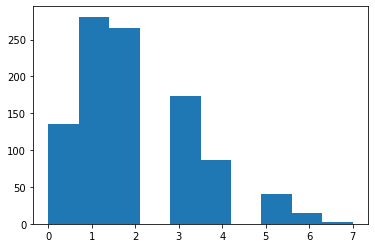

In [106]:
graph = Graph(1000)
graph.ER(0.002)
t =graph.vertex_degree()
print(t)
plt.hist(t)